# Есть ли ионы в ступеньке? Или полимер набухший с ионами внутри?

In [1]:
from math import pi
from math import sqrt

import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA
from scipy.signal import find_peaks

import matplotlib.cm as cm

from create_in import create_in
from out_reader import out_reader
import numpy as np

In [2]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs = 0.06

chi = 2.7

chi_ions = 0.5

In [3]:
file_name_pro = create_in(
        range_param = 'chi',
        min_val = 0,
        max_val = 2,
        Cs = Cs,
        chi_first_try = 0.5,
        chi_ions_first_try = 0.5,
        chi_surf_first_try = 0.5,
        N_layers_first_try = N - 250,
        N_first_try = N,

        S = S_namics,
        alpha = alpha,
        Kuhn = '1e-09',
        initial_cond = True,
        
        N_layers = N - 250,
        N = N,
        chi = chi,
        chi_ions = chi_ions,
        chi_surf = chi,
    )
psi, q, phi_brush, phi_end_brush, phi_Na, phi_Cl, phi_W = out_reader(alpha = alpha,file_names=file_name_pro)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.270883e+00 |g| = 6.014344e+00 alpha = 1.000000e+00 
hessian scaling: 1.6605
it =  1  E = 2.068960e+00 |g| = 5.491560e+00 alpha = 1.166269e-01 
it =  2  E = 2.501707e+00 |g| = 5.991194e+00 alpha = 8.225088e-02 
it =  3  E = 4.518547e+00 |g| = 5.455125e+00 alpha = 2.125402e-02 
it =  4  E = 6.360390e+00 |g| = 5.537542e+00 alpha = 1.019704e-02 
it =  5  E = 3.011213e+00 |g| = 5.196399e+00 alpha = 4.015169e-02 
it =  6  E = 4.502180e+00 |g| = 5.109506e+00 alpha = 1.659328e-02 
it =  7  E = 4.111975e+00 |g| = 5.048460e+00 alpha = 1.852779e-02 
it =  8  E = 4.639836e+00 |g| = 4.748269e+00 alpha = 1.291549e-02 
it =  9  E = 2.114657e+00 |g| = 5.003648e+00 alpha = 6.239940e-02 
it =  

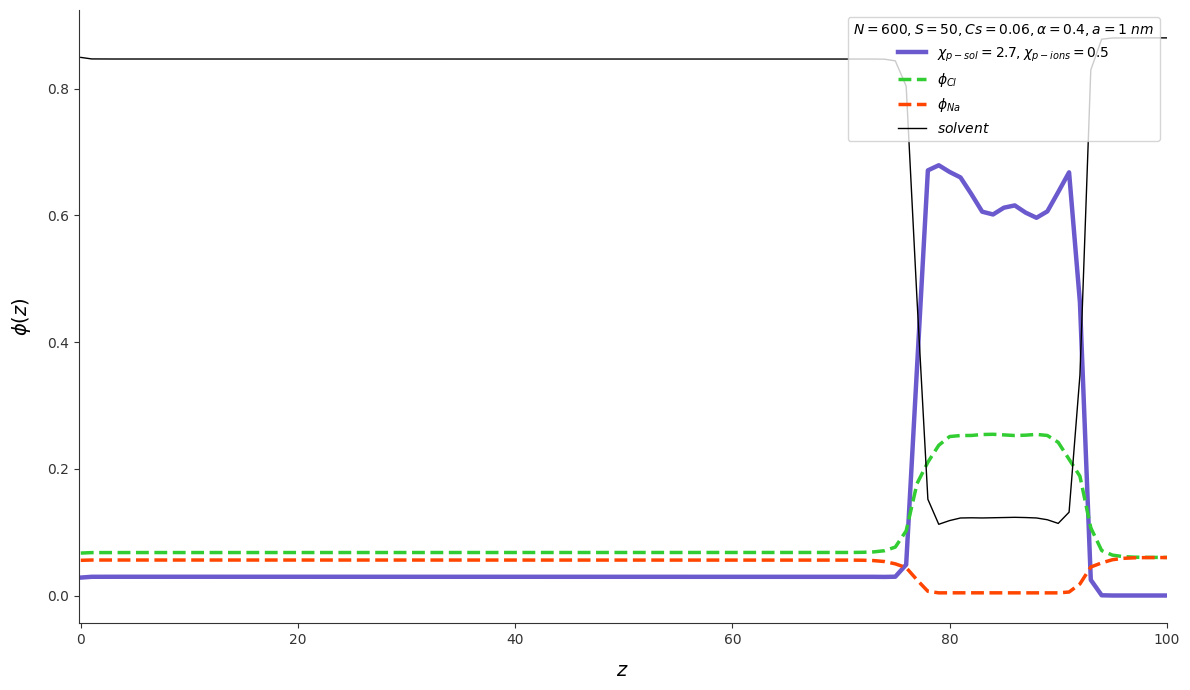

In [4]:
import matplotlib.pyplot as plt

# Создаем фигуру и оси
fig, ax1 = plt.subplots(figsize=(12, 7))  

# Первый график для phi_brush
ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")

# График для phi_Cl
ax1.plot(phi_Cl, color='limegreen', label='$\\phi_{Cl}$', linewidth=2.5, linestyle="--")

# График для phi_Na
ax1.plot(phi_Na, color='orangered', label='$\\phi_{Na}$', linewidth=2.5, linestyle="--")

# График для растворителя (phi_W)
ax1.plot(phi_W, color='black', label='$solvent$', linewidth=1, linestyle="-")

# Оформление осей
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
ax1.set_xlim(-0.2, 100)

# Настройка внешнего вида
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Легенда
ax1.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()
